**[<font size=6>Jakarta travel time prediction Competition</font>](https://contest.yandex.com/contest/74775)** [**rules**](https://disk.yandex.com/d/7xJ8GeGacA5KbA) for task.

<font color=green><h3><b>**Task description**</b><font>

**Predictive Regression Modeling**: predict the duration of a car trip based on the features of a route in Jakarta. The available features include the start and end points, weather conditions, road traffic, and others.


The dataset is divided into the training and test subsets (with no target values for the objects — you need to predict those). Your target variable is the travel time 'travel_time', a numerical feature. You need to predict it in the test dataset.






<font color=green><h3><b>**About Data**</b><font>

<font color=green><h5><b> Dataset Overview</b><font>

The dataset contains information on various trips across the city of Jakarta. There is no real-world data in the dataset.

<font color=green><h5><b>Column Descriptors</b><font><font color=green>

1. **start_point, end_point**: Districts of Jakarta from which and to which the trip is being made (for example, Central Jakarta → North Jakarta).
2. **time_of_day**: Time of the day.
3. **day_of_week**: Day of the week.
4. **traffic_condition**: Traffic conditions during the trip (congestions etc.).
5. **event_count**: Number of events occurring near the route.
6. **is_holiday**: Whether the trip takes place on the same day as a public holiday.
7. **weather**: Weather conditions on the day of the trip.
8. **population_density**: Population density in the districts along the route.
9. **vehicle_density**: Vehicle density in the districts along the route.
10. **public_transport_availability**: Availability of public transport along the route.
11. **historical_delay_factor**: Total travel delay on the day of the trip.
12. **travel_time**: Actual travel time (**target**).

<font color=green><h3><b>About the solution and the baseline
</b><font>


You can solve the task using the pipeline we’ve studied in the course. You need to apply the preprocessing and target prediction methods from the regression task module. To help you approach the task, we’ll highlight the problems in the dataset and the starting points for your experiments.

Pay special attention to data handling and preprocessing, as well as exploratory data analysis (EDA). We also suggest that you look into other linear and non-linear regression prediction algorithms.


<font color=green><h3><b>Competition's Rules

You can find about rules and evaluation your solution [here](https://disk.yandex.com/d/7xJ8GeGacA5KbA).



<font color=green><h3><b> **Solution format**</b><font>


It is needed to provide two files:
Submission-file to be uploaded to the Yandex Contest system As a solution and Notebook-file to be sent via email by request from the Organiser after the competition ended up.


Notebook-file. This is an IPYNB-file that contains the code for preparing the Submission-file. The preparation code consists of importing and preparing data, training the model, and preparing the file itself with responses for the test sample. This includes predicting the target/responses for the test sample. The notebook-file will be needed to check reproducibility (Rules, clause 6.2.4.).




<font color=green><h3><b> **Evaluation your solution at Yandex Competition**</b><font>


To evaluate your solution, we’ll use the [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination) metric on the test sample (test_sample.csv). The column with the true target variable has been deleted in the file. Your task is to predict the target variable value for each object, fill in the submission file, and send it to the Yandex Contest for evaluation.

Make sure that the order of objects in the submission file is the same as in the test dataset test_sample.csv — otherwise, we won’t be able to evaluate your solution. See below for instructions on how to prepare the submission file. Your need to fill in the submission.csv file with predicted values of the target regression variable for each object in the test dataset (that is, the predicted travel time for each trip).

The Yandex Contest system will calculate the prediction error and return your model’s error rate on the test dataset. Your score will appear on the leaderboard, ranked against the other contestants. For more information how Yandex Contest evaluates your solutions, see instructions below.

<font color=green><h3><b>**Preparing the submission file**</b><font>

Use the code from this notebook to prepare your submission file. Make sure that the order of objects in the submission file is the same as in the test dataset, and that there is only not-indexed one column with responses from your model. You’ll find the preparation code below the baseline solution. Click [here](https://www.kaggle.com/code/sgwood/step-1-understanding-the-submission-file). for more information about the submission file.


<font color=green><h3><b>**More about uploading the file and LeaderBoard the Yandex Contest**</b><font>




To send a submission file, open the [competition](https://contest.yandex.com/contest/74775/enter/), go to Problems, select the task "Jakarta Travel Time Prediction", choose a file from your local storage, and submit it by clicking Send File. This is also where you can check how many attempts you have left to solve the competition tasks.


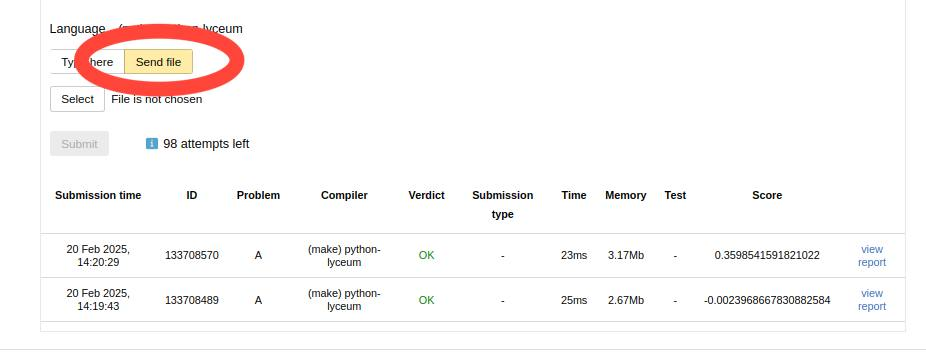



If your submission is prepared correctly (see the instructions above, use the baseline approach), the system returns the "OK" verdict. In addition, the system gives your submission a score based on the $R^2$ value for the test sample.

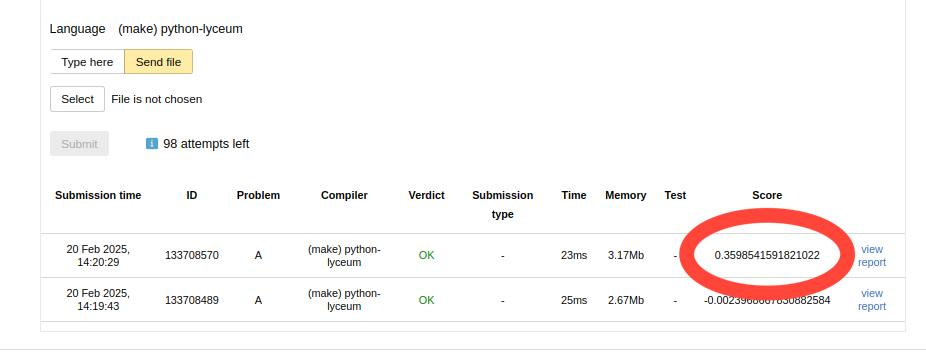

After submission, your score appears on the general leaderboard, visible to both you and other participants. Rankings are based on score, which serves as the main competition metric. The leaderboard displays your highest-scoring submission. The score shown in the leaderboard monitor table updates only when your best result improves.

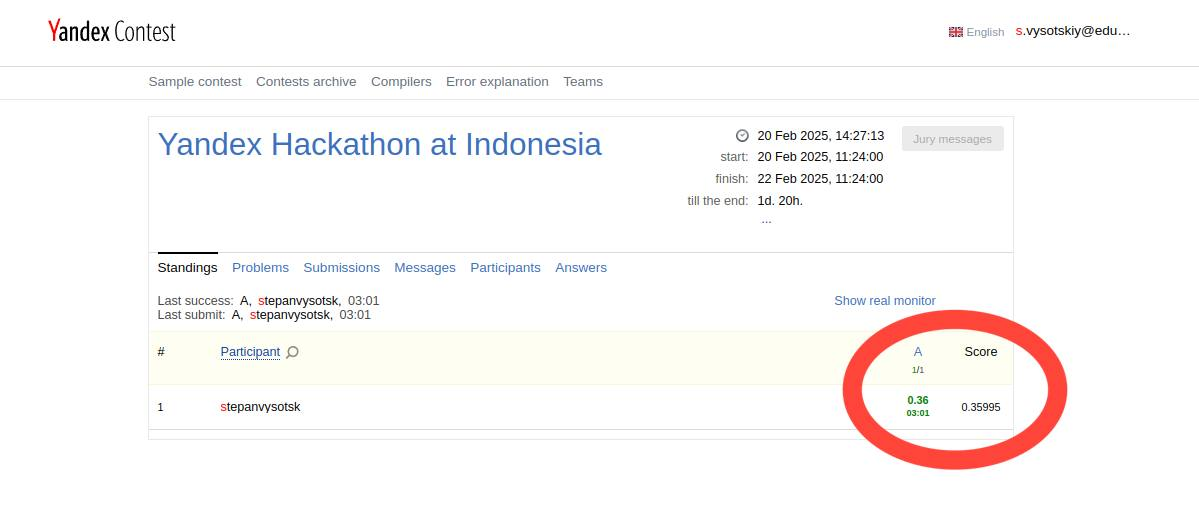

<font color=green><h3><b>**Your works**</b><font>

Your code.

In [ ]:
# Import Library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Memuat Dataset train
train = pd.read_csv('train_sample.csv')
train

,start_point,end_point,time_of_day,day_of_week,traffic_condition,event_count,is_holiday,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor,travel_time
0,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Sunday,NaN,9,1,NaN,high,NaN,1,0.878909,26.907612
1,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Thursday,NaN,7,1,medium,high,NaN,1,1.081668,27.489129
2,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),morning,Thursday,NaN,7,0,medium,low,NaN,2,1.192379,27.228978
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Friday,10.0,9,0,medium,high,fog,1,0.833348,33.943970
4,Central Jakarta (Jakarta Pusat),West Jakarta (Jakarta Barat),day,Tuesday,NaN,7,0,medium,high,rain,2,0.966819,20.603115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),evening,Saturday,7.0,7,0,NaN,medium,clear,1,0.819783,55.939329
39996,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),morning,Friday,9.0,7,1,medium,NaN,fog,1,0.914077,55.668274
39997,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),evening,Friday,5.0,7,0,low,low,fog,1,0.943298,60.548584
39998,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Thursday,10.0,9,1,NaN,NaN,rain,1,1.185288,23.996753


In [ ]:
# Memuat Dataset test
test = pd.read_csv('test_sample.csv')
test

,start_point,end_point,time_of_day,day_of_week,traffic_condition,event_count,is_holiday,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor
0,West Jakarta (Jakarta Barat),East Jakarta (Jakarta Timur),morning,Saturday,5.0,8,1,medium,NaN,NaN,2,1.126429
1,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),evening,Saturday,NaN,9,1,low,medium,fog,2,1.121015
2,Central Jakarta (Jakarta Pusat),South Jakarta (Jakarta Selatan),morning,Friday,9.0,8,0,high,NaN,rain,1,1.109638
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),night,Wednesday,5.0,8,1,low,NaN,storm,1,0.842474
4,Central Jakarta (Jakarta Pusat),North Jakarta (Jakarta Utara),morning,Tuesday,NaN,9,1,high,NaN,rain,2,0.775742
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),night,Saturday,NaN,7,1,low,low,storm,1,1.125863
2996,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),day,Monday,NaN,9,1,high,medium,NaN,2,0.941115
2997,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),day,Saturday,5.0,9,1,medium,high,fog,2,0.973585
2998,North Jakarta (Jakarta Utara),West Jakarta (Jakarta Barat),day,Tuesday,NaN,7,0,low,medium,clear,0,0.815122


In [ ]:
# Melihat informasi dari Data train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   start_point                    40000 non-null  object 
 1   end_point                      40000 non-null  object 
 2   time_of_day                    40000 non-null  object 
 3   day_of_week                    40000 non-null  object 
 4   traffic_condition              25599 non-null  float64
 5   event_count                    40000 non-null  int64  
 6   is_holiday                     40000 non-null  int64  
 7   vehicle_density                25622 non-null  object 
 8   population_density             25552 non-null  object 
 9   weather                        25571 non-null  object 
 10  public_transport_availability  40000 non-null  int64  
 11  historical_delay_factor        40000 non-null  float64
 12  travel_time                    40000 non-null 

Data training ini memiliki 40000 baris, dan ada beberapa data yang tidak lengkap.

In [ ]:
# Melihat informasi dari Data test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   start_point                    3000 non-null   object 
 1   end_point                      3000 non-null   object 
 2   time_of_day                    3000 non-null   object 
 3   day_of_week                    3000 non-null   object 
 4   traffic_condition              2400 non-null   float64
 5   event_count                    3000 non-null   int64  
 6   is_holiday                     3000 non-null   int64  
 7   vehicle_density                2400 non-null   object 
 8   population_density             2400 non-null   object 
 9   weather                        2400 non-null   object 
 10  public_transport_availability  3000 non-null   int64  
 11  historical_delay_factor        3000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage:

In [ ]:
# Cek missing values per fitur pada data train
print("\nMissing values per fitur: ")
print(train.isnull().sum())


Missing values per fitur: 
start_point                          0
end_point                            0
time_of_day                          0
day_of_week                          0
traffic_condition                14401
event_count                          0
is_holiday                           0
vehicle_density                  14378
population_density               14448
weather                          14429
public_transport_availability        0
historical_delay_factor              0
travel_time                          0
dtype: int64


In [ ]:
# Cek missing values per fitur pada data test
print("\nMissing values per fitur: ")
print(test.isnull().sum())


Missing values per fitur: 
start_point                        0
end_point                          0
time_of_day                        0
day_of_week                        0
traffic_condition                600
event_count                        0
is_holiday                         0
vehicle_density                  600
population_density               600
weather                          600
public_transport_availability      0
historical_delay_factor            0
dtype: int64


In [ ]:
# Cek data duplikat pada data train
print("\nJumlah data duplikat data train: ", train.duplicated().sum())

# Cek data duplikat pada data test
print("\nJumlah data duplikat data test: ", test.duplicated().sum())


Jumlah data duplikat data train:  0

Jumlah data duplikat data test:  0


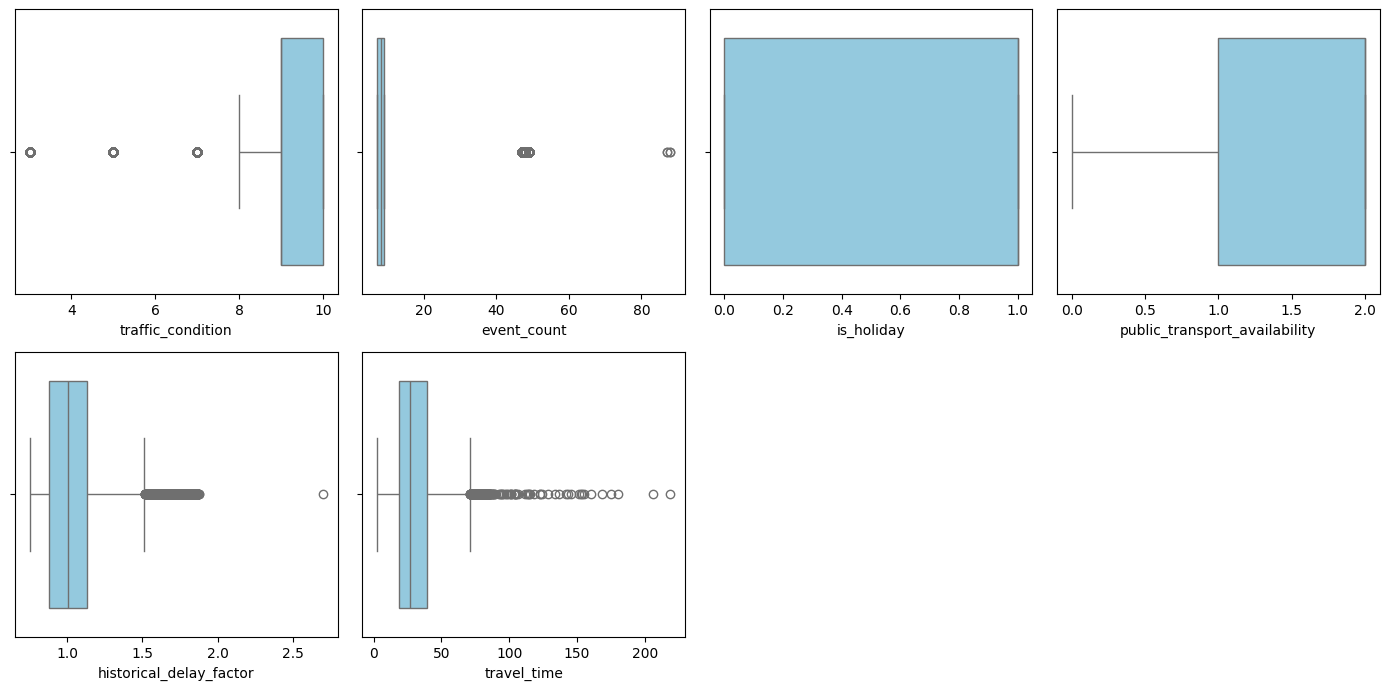

In [ ]:
# Cek outlier pada data train
numerical_features_train = train.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_features_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=train[column], color='skyblue')

plt.tight_layout()
plt.show()

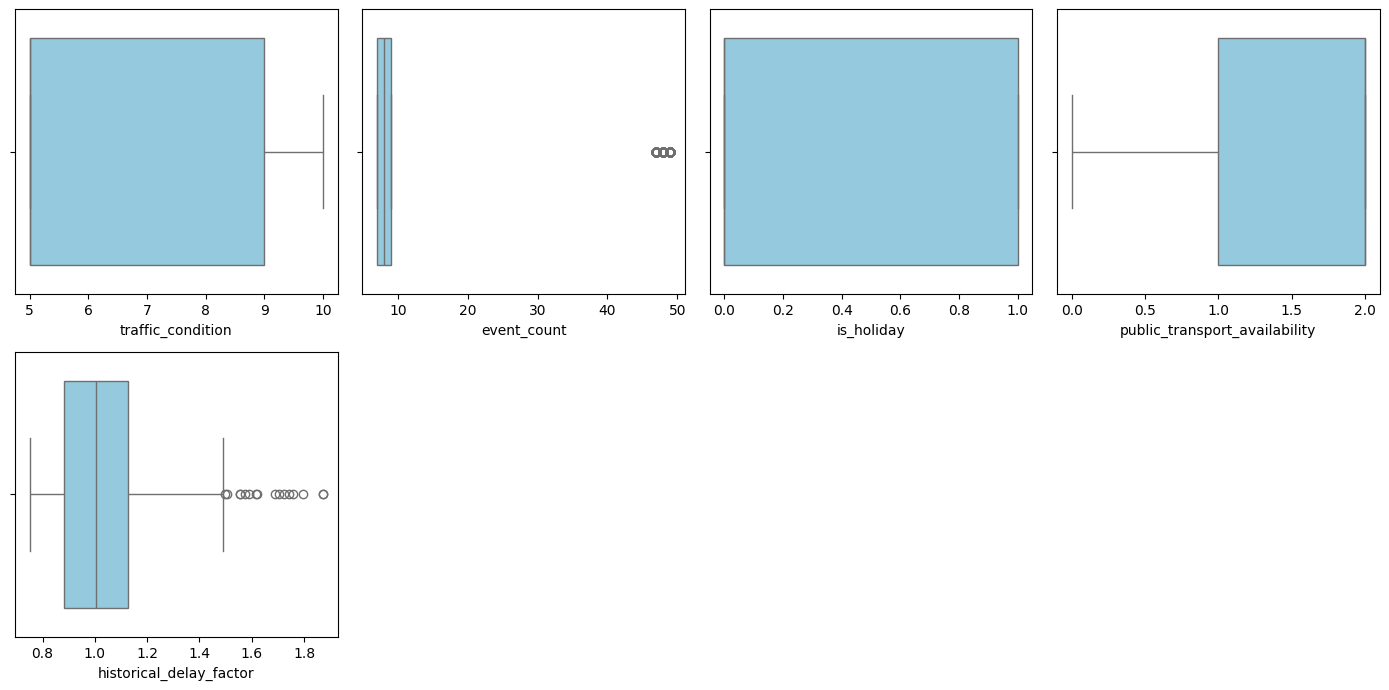

In [ ]:
# Cek outlier pada data test
numerical_features_test = test.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_features_test.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=test[column], color='skyblue')

plt.tight_layout()
plt.show()

## Data Visualisasi

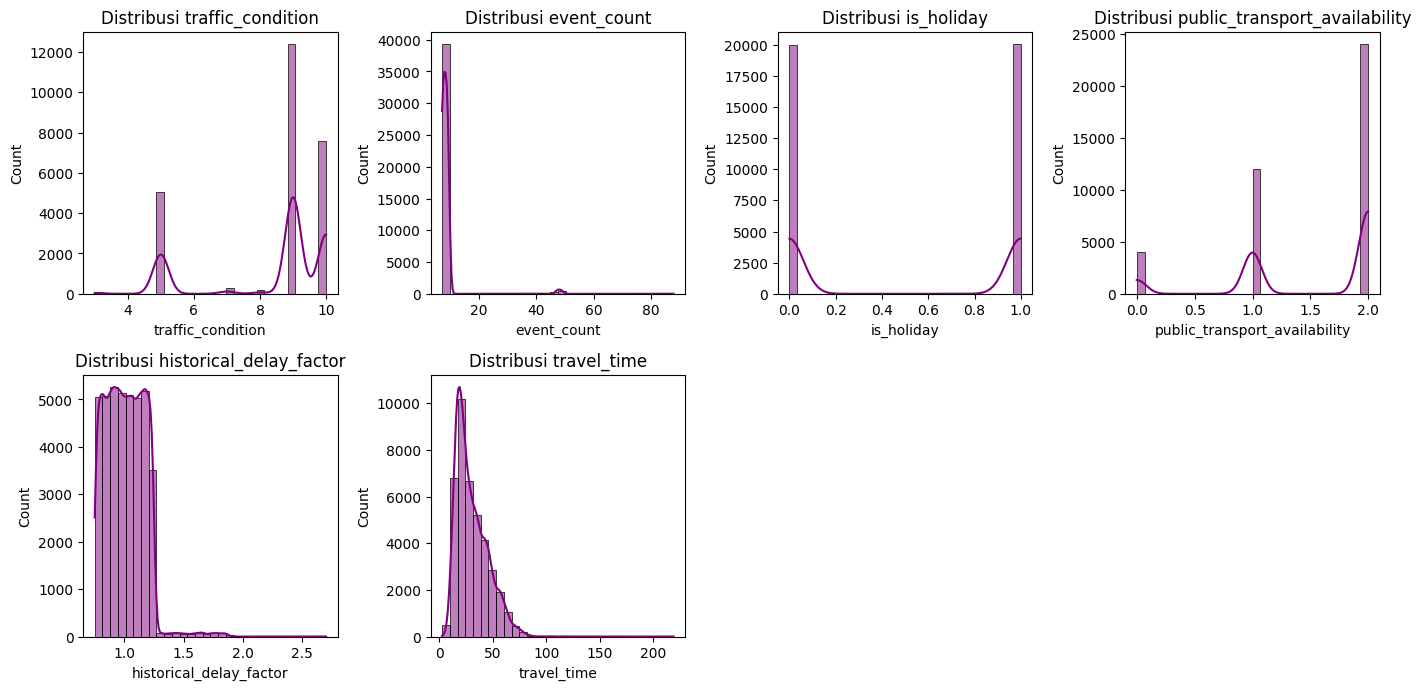

In [ ]:
# Ditribusi fitur numerik untuk data train
num_features = train.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-13-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
/tmp/ipython-input-13-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
/tmp/ipython-input-13-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
/tmp/ipython-input-13-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` a

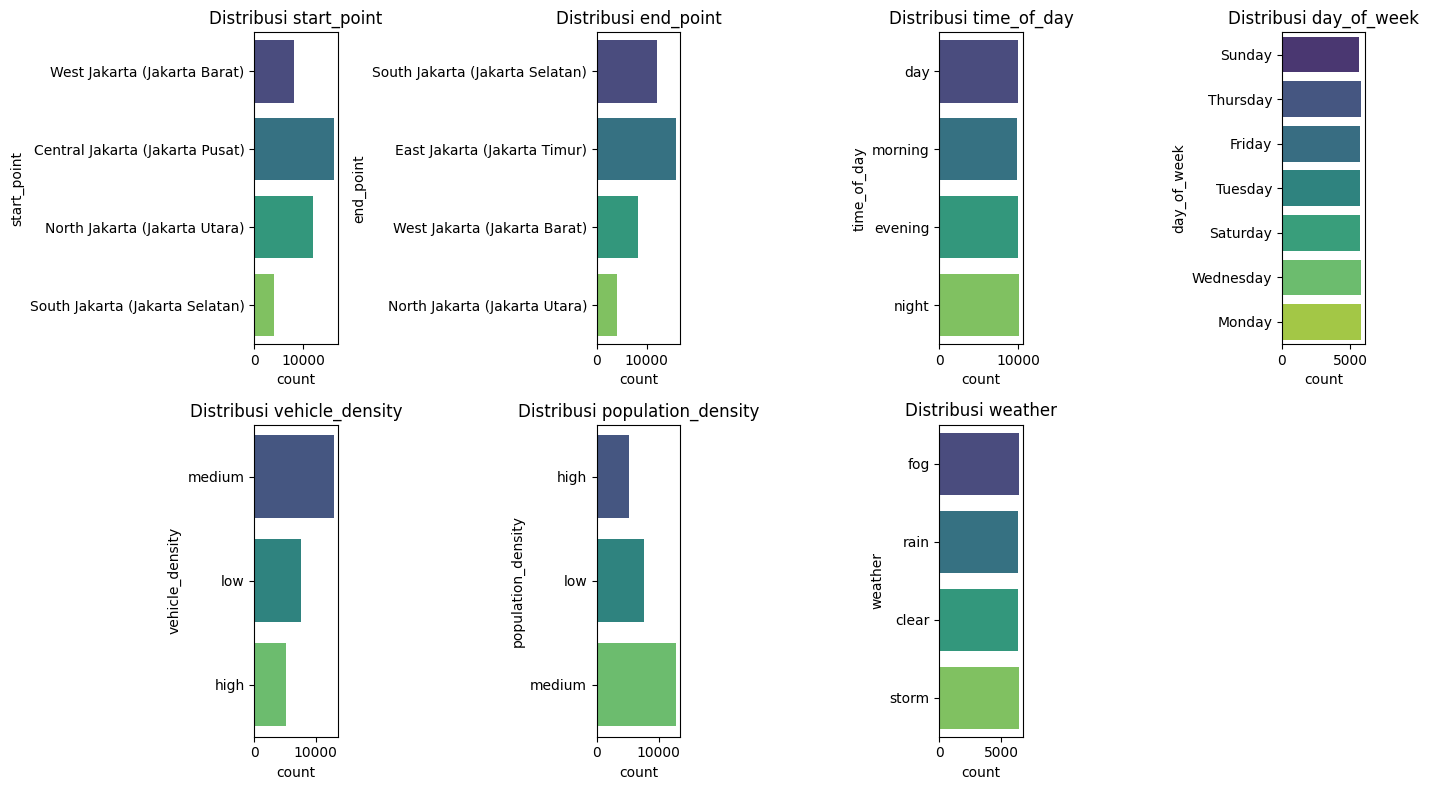

In [ ]:
# Distribusi fitur kategorikal pada data train
cat_features = train.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=train[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

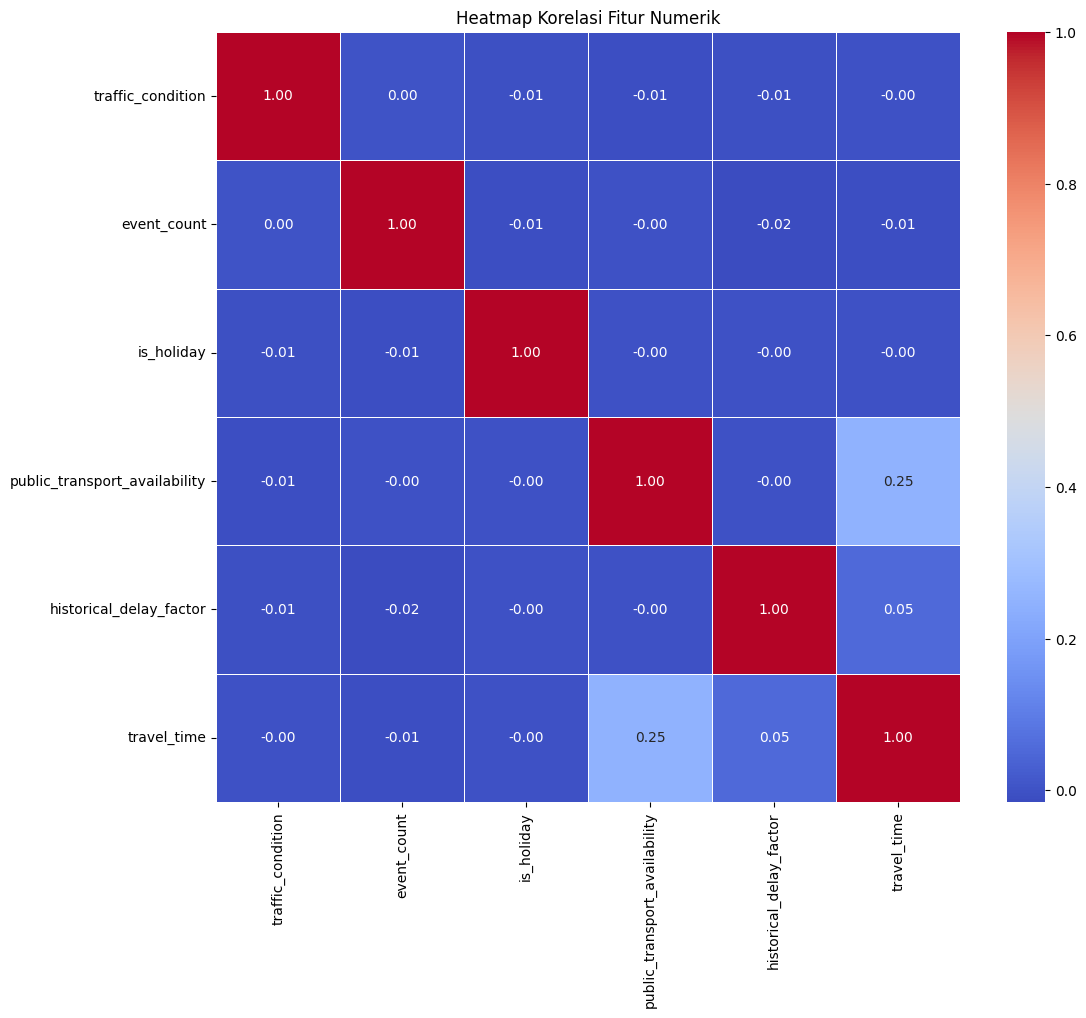

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

<font color=green><h3><b>$\alpha$. Preprocessing and EDA</b><h3>

Note there are many omissions, duplicates, outliers, and non-informative features in the dataset, so you need to improve its quality for model training. Below, we highlight some of the problems in the data that may degrade the model quality.</font>

<font color=green>Use graphs to explore the data in detail and find relationships that you can later incorporate into the model. Let’s plot a couple of graphs that may be useful for further model building.</font>


In [ ]:
fill_mode = lambda col: col.fillna(col.mode())
train = train.fillna({k: v[0] for k, v in train.mode().to_dict().items()})
test = test.fillna({k: v[0] for k, v in train.mode().to_dict().items()})

In [ ]:
# Cek kembali missing values per fitur pada data train
print("\nMissing values per fitur: ")
print(train.isnull().sum())


Missing values per fitur: 
start_point                      0
end_point                        0
time_of_day                      0
day_of_week                      0
traffic_condition                0
event_count                      0
is_holiday                       0
vehicle_density                  0
population_density               0
weather                          0
public_transport_availability    0
historical_delay_factor          0
travel_time                      0
dtype: int64


In [ ]:
# Mengatasi / mengidentifikasi outliers menggunakan IQR
Q1 = train[numerical_features_train.columns].quantile(0.25)
Q3 = train[numerical_features_train.columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai batas
for feature in numerical_features_train.columns:
    train.loc[train[feature] < lower_bound[feature], feature] = lower_bound[feature]
    train.loc[train[feature] > upper_bound[feature], feature] = upper_bound[feature]

/tmp/ipython-input-17-2022049161.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train[feature] < lower_bound[feature], feature] = lower_bound[feature]
/tmp/ipython-input-17-2022049161.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[train[feature] < lower_bound[feature], feature] = lower_bound[feature]


In [ ]:
# Mengatasi / mengidentifikasi outliers menggunakan IQR
Q1 = test[numerical_features_test.columns].quantile(0.25)
Q3 = test[numerical_features_test.columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai batas
for feature in numerical_features_test.columns:
    test.loc[test[feature] < lower_bound[feature], feature] = lower_bound[feature]
    test.loc[test[feature] > upper_bound[feature], feature] = upper_bound[feature]

/tmp/ipython-input-18-3340630901.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[test[feature] < lower_bound[feature], feature] = lower_bound[feature]
/tmp/ipython-input-18-3340630901.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[test[feature] < lower_bound[feature], feature] = lower_bound[feature]


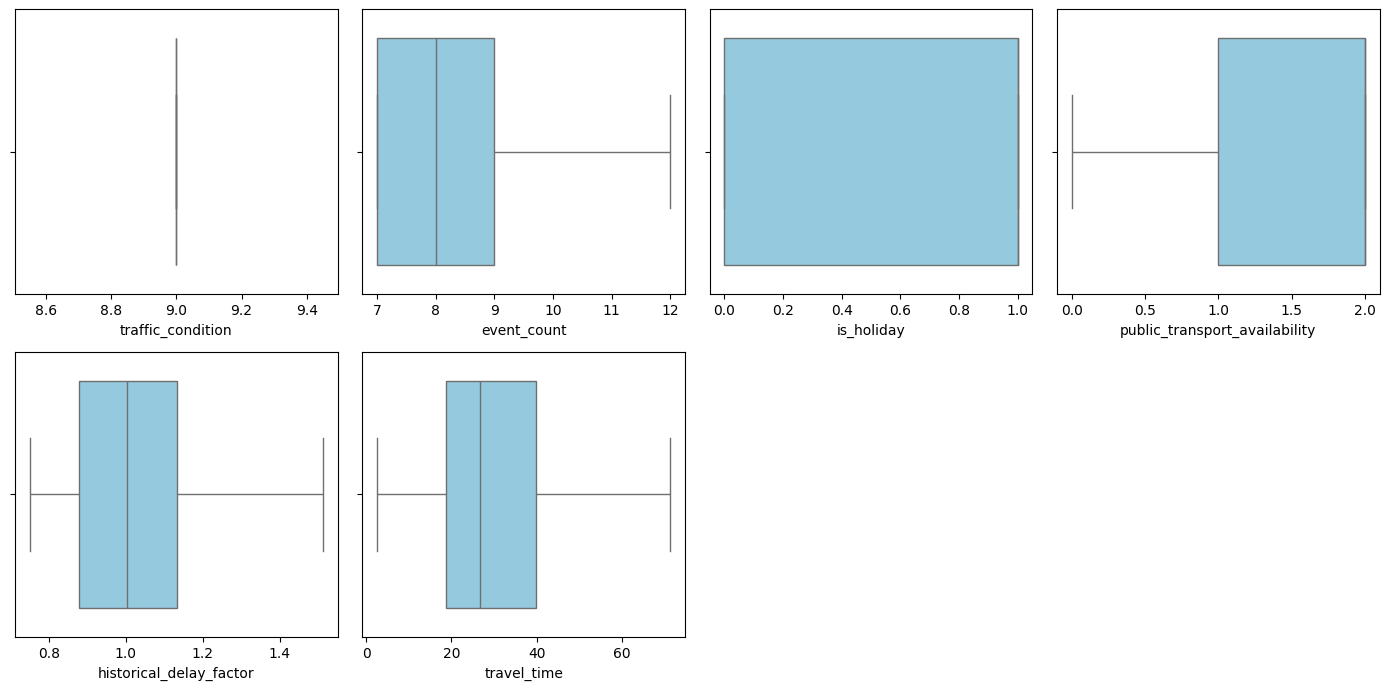

In [ ]:
# Cek kembali outlier pada data train
numerical_features_train = train.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_features_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=train[column], color='skyblue')

plt.tight_layout()
plt.show()

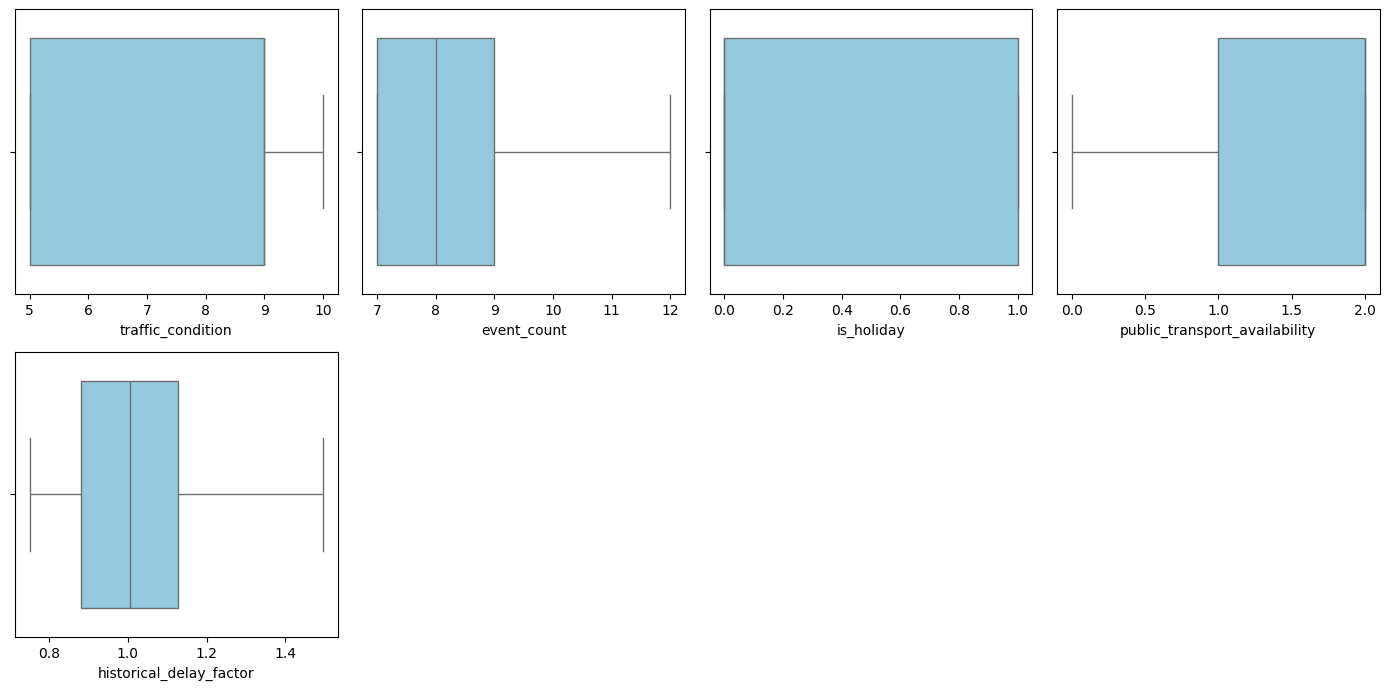

In [ ]:
# Cek outlier pada data test
numerical_features_test = test.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_features_test.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=test[column], color='skyblue')

plt.tight_layout()
plt.show()

In [ ]:
y_train = train['travel_time']
X_train = train.drop('travel_time', axis=1)
X_test = test


In [ ]:
# Column Transform train dan test
categorical_features = ['start_point','end_point','time_of_day','day_of_week','vehicle_density','population_density','weather']
numerical_features = ['traffic_condition','event_count','is_holiday','public_transport_availability','historical_delay_factor']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [ ]:
X_train_scaled.shape

(40000, 34)

In [ ]:
X_test_scaled.shape

(3000, 34)

In [ ]:
y_train

,travel_time
0,26.907612
1,27.489129
2,27.228978
3,33.943970
4,20.603115
...,...
39995,55.939329
39996,55.668274
39997,60.548584
39998,23.996753


<font color=green><H3><b>$\gamma$. Model: fitting regressor </b></H2>
</font>

<font color=green> Now let’s train a CatBoostRegressor model on the data. You can find more about the CatBoost model by Yandex [here](https://catboost.ai/).
</font>


In [ ]:
pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 14.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

# Fungsi objective untuk tuning hyperparameter
def objective(trial):
    # Hyperparameter yang akan dioptimasi
    loss = trial.suggest_categorical('loss', ['squared_error', 'huber', 'epsilon_insensitive'])
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
    alpha = trial.suggest_float('alpha', 1e-6, 1e-1, log=True)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling'])
    eta0 = trial.suggest_float('eta0', 1e-4, 1.0, log=True)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    # Inisialisasi model
    model = SGDRegressor(
        loss=loss,
        penalty=penalty,
        alpha=alpha,
        learning_rate=learning_rate,
        eta0=eta0,
        fit_intercept=fit_intercept,
        max_iter=1000,
        tol=1e-3,
        random_state=42
    )

    # Cross-validation hanya di data train
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='r2')

    return -np.mean(scores)  # karena ingin memaksimalkan R²

# Optuna untuk stud GDC
study_sgd = optuna.create_study(direction='minimize')
study_sgd.optimize(objective, n_trials=200, timeout=3600)

print("[SGD] Best parameter: ", study_sgd.best_params)
print("[SGD] Best value: ", study_sgd.best_value)


[I 2025-07-11 10:28:33,419] A new study created in memory with name: no-name-79481249-0669-4a4b-907a-e88095fc4972
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing 

[SGD] Best parameter:  {'loss': 'squared_error', 'penalty': 'l1', 'alpha': 0.00044978261825588824, 'learning_rate': 'constant', 'eta0': 0.00021672347024761355, 'fit_intercept': False}
[SGD] Best value:  -0.8821093075565913


In [ ]:
# Latih model terbaik dengan seluruh data train
best_param_sgd = {'loss': 'squared_error', 'penalty': 'l1', 'alpha': 0.00044978261825588824, 'learning_rate': 'constant', 'eta0': 0.00021672347024761355, 'fit_intercept': False}

sgd_model = SGDRegressor(
    loss=best_param_sgd['loss'],
    penalty=best_param_sgd['penalty'],
    alpha=best_param_sgd['alpha'],
    learning_rate=best_param_sgd['learning_rate'],
    eta0=best_param_sgd['eta0'],
    fit_intercept=best_param_sgd['fit_intercept'],
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

sgd_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data pelatihan dan uji
y_pred_train = sgd_model.predict(X_train_scaled)


# Evaluasi akurasi model
score_train_gbc = r2_score(y_train, y_pred_train)
mae_train_gbc = mean_absolute_error(y_train, y_pred_train)
mse_train_gbc = mean_squared_error(y_train, y_pred_train)

#r2 = r2_score(y_train, y_train_hat)
print(f"\n R² Score on Training Set: {score_train_gbc :.2f}")
print(f"\n MAE Score on Training Set: {mae_train_gbc :.2f}")
print(f"\n MSE Score on Training Set: {mse_train_gbc :.2f}")


 R² Score on Training Set: 0.91

 MAE Score on Training Set: 3.31

 MSE Score on Training Set: 19.18


<font color=green><H3><b>$\delta$. Model: evaluation and submit</b></H2>
</font>

<font color=green> Evaluate the model using a selected metric (for example, MSE). Fill in the submission.csv file with the prediction data generated by the model and submit it to the LMS.</font>

In [ ]:
y_train_hat = sgd_model.predict(X_train_scaled)
mse_lr = mean_squared_error(y_train_hat, y_train)
r2_lr = r2_score(y_train_hat, y_train)
mse_lr, r2_lr
# also: RMSE will estimate the error on the dataset in the original units

(19.1806108254063, 0.9010952879997783)

In [ ]:
# submission
y_hat_test = sgd_model.predict(X_test_scaled)
pd.DataFrame(y_hat_test).to_csv('submission2.csv', index=False) # save csv-file to root/submission.csv

In [ ]:
# attention! check, this code cell should run without errors
pd.read_csv('submission2.csv')['0']

,0
0,45.056801
1,21.699558
2,23.588971
3,19.782080
...,...
2996,24.591493
2997,16.169749
2998,13.562473
2999,16.153129


In [ ]:
# also: example of preparing zeros submission
# this file preparation is identical to the preparation described above:

# y_hat_test = np.zeros(y_hat_test.shape)
# pd.DataFrame(y_hat_test).to_csv('submission.csv', index=False)

<font color=green>Send the submission file to the LMS.<font color=green>

<font color=green><h3><b>$\epsilon$. References:</b></h3></font>

<font color=green> Remember to cite your sources here! List resources that helped you with ideas and code ([articles/books](https://scholar.google.com/), StackOverflow, Wikipedia, etc.)

<font color=green><b>Student's answer:</b></font>

1. ...
1. ...
1. ...

</font>

<font color=green><h3><b>$\zeta$. Documentation: Explain decisions in your process</b></h3></font>

<font color=green><h4><b>Task 1. Explain Decisions in Preprocessing Pipeline</b></h4></font>

<font color=green>
Explain elements of your preprocessing pipeline i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.</font>

<font color=green>

1. Why did you choose these elements? (Something in EDA, prior experience,...? Note: EDA is not required)
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>


<font color=green><b>Student's answer:</b></font>

...

<font color=green><h4><b>Task 2. Explain Decisions in Modeling Pipeline</b></h4></font>

<font color=green>
Explain your modeling approach, i.e. ideas you tried and why you thought they would be helpful.

1. How did these decisions guide you in modeling?
1. How do you evaluate the effectiveness of these elements?
1. What else have you tried that worked or didn't?

</font>

<font color=green><b>Student's answer:</b></font>

...

# 💡**Starter Ideas**

1. **Preproccesing**: thoroughly preprocess the data, removing duplicates and filling in the omissions with more complex rules (for example, use the mode for each feature).
2. **EDA**: explore the distribution of the object features, remove outliers, and carefully examine the target variable. Exploratory data analysis may yield more important insights than any machine learning model, because your findings have will have one invaluable quality — interpretability. You may want take a closer look at the discrete distributions of categorical features, as well as the number of unique feature values and how informative the variable is. Examine shifts in variable values, including in different datasets (training and test).
2. **Robust algorithms and interpretability**: Check the test dataset for shifts and the retention of dependencies learned by the model. To assess the model’s representativeness, use a holdout dataset. You might want to train more robust models that will deliver high quality regardless of dataset shifts. For example, you may try to thoroughly analyze the data and describe the target variable with decision algorithms (match-case statement, if-else).
3. **Hypotheses**: We recommend formulating your own hypotheses regarding the factors that influence the travel time. For example, you may use the data to derive the lower estimate for the trip duration that captures most of the true dependencies.
4. **Data**: The use of additional data for solving the problem is allowed if this helps to understand the nature of the data provided. One example of useful features may include data on districts and routes in Jakarta.
3. **Tuning model, validation set**: for the final stage, a model is usually evaluated on a validation set rather than on a training dataset. A part of the training dataset is put aside for the validation set, and the model is trained on the remaining data. Validation sets are also useful for tuning hyperparameters (for example, using cross-validation) for optimal model performance.
4. **Other linear (and non-linear) models**: Try out different approaches to linear models (Ridge, Lasso, SGDRegressor, MLPRegressor).
8. **Ensemble**: Use ensemble learning and apply various averaging methods (Voting Classifier, Bagging, Boosting).
